In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
brain_tumor = pd.read_csv("D:/Hostipal_ML/Brain_Tumor_Prediction_Dataset.csv")

In [3]:
# brain_tumor dataset
brain_tumor

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,77,Female,Germany,2.05,Frontal,Normal,9,Yes,Yes,High,...,No,93/80,Yes,Benign,Chemotherapy,36,Rapid,Yes,Mild,No
249996,89,Other,Japan,3.55,Parietal,Normal,75,Yes,No,Low,...,Yes,119/112,Yes,Benign,Radiation,80,Slow,Yes,Moderate,Yes
249997,16,Other,Russia,8.54,Temporal,Normal,52,No,Yes,Low,...,Yes,101/68,Yes,Malignant,Radiation,72,Slow,No,Severe,Yes
249998,56,Other,Germany,2.17,Cerebellum,Severe,95,Yes,No,High,...,No,179/106,Yes,Benign,NaN,83,Rapid,Yes,Moderate,Yes


In [4]:
brain_tumor.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


In [5]:
brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Blood_Pressure       250000 non-null  object 
 13  Diabetes             250000 non-null  object 
 14  Tumor_Type           250000 non-null  object 
 15  Treatment_Receive

In [6]:
# Creating a New Target Variable 'Patient_Readmitted'
# Assumption: Patients with Survival Rate < 50 and Malignant tumors are likely to be readmitted

brain_tumor['Patient_Readmitted'] = brain_tumor.apply(
    lambda row: 'Yes' if row['Survival_Rate(%)'] < 50 and row['Tumor_Type'] == 'Malignant' else 'No',
    axis=1
)

In [7]:
# Spliting  Blood Pressure into Systolic and Diastolic
brain_tumor[['Systolic_BP', 'Diastolic_BP']] = brain_tumor['Blood_Pressure'].str.split('/', expand=True)

# Converting  to integers
brain_tumor['Systolic_BP'] = pd.to_numeric(brain_tumor['Systolic_BP'], errors='coerce')
brain_tumor['Diastolic_BP'] = pd.to_numeric(brain_tumor['Diastolic_BP'], errors='coerce')

# Droping the original Blood_Pressure column
brain_tumor.drop('Blood_Pressure', axis=1, inplace=True)

In [8]:
brain_tumor

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present,Patient_Readmitted,Systolic_BP,Diastolic_BP
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Malignant,NaN,58,Slow,Yes,Mild,No,No,122,88
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,Malignant,NaN,13,Rapid,Yes,Severe,No,Yes,126,119
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes,No,118,65
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,Benign,Radiation,85,Moderate,No,Moderate,Yes,No,165,119
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Malignant,NaN,17,Moderate,No,Moderate,No,Yes,156,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,77,Female,Germany,2.05,Frontal,Normal,9,Yes,Yes,High,...,Benign,Chemotherapy,36,Rapid,Yes,Mild,No,No,93,80
249996,89,Other,Japan,3.55,Parietal,Normal,75,Yes,No,Low,...,Benign,Radiation,80,Slow,Yes,Moderate,Yes,No,119,112
249997,16,Other,Russia,8.54,Temporal,Normal,52,No,Yes,Low,...,Malignant,Radiation,72,Slow,No,Severe,Yes,No,101,68
249998,56,Other,Germany,2.17,Cerebellum,Severe,95,Yes,No,High,...,Benign,NaN,83,Rapid,Yes,Moderate,Yes,No,179,106


In [9]:
 #Droping columns that are not needed
brain_tumor.drop(['Country'], axis=1, inplace=True)

In [10]:
#Finding null value
brain_tumor.isna().sum()

Age                        0
Gender                     0
Tumor_Size                 0
Tumor_Location             0
MRI_Findings               0
Genetic_Risk               0
Smoking_History            0
Alcohol_Consumption        0
Radiation_Exposure         0
Head_Injury_History        0
Chronic_Illness            0
Diabetes                   0
Tumor_Type                 0
Treatment_Received     62748
Survival_Rate(%)           0
Tumor_Growth_Rate          0
Family_History             0
Symptom_Severity           0
Brain_Tumor_Present        0
Patient_Readmitted         0
Systolic_BP                0
Diastolic_BP               0
dtype: int64

In [11]:
#  Handling null values in Treatment_Received
brain_tumor['Treatment_Received'] = brain_tumor['Treatment_Received'].fillna('None')

In [12]:
 # Label encode binary/ordinal columns
label_enc_cols = [
    'Gender', 'Smoking_History', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Head_Injury_History', 'Chronic_Illness', 'Diabetes', 'Tumor_Type',
    'Family_History', 'Symptom_Severity', 'Patient_Readmitted','Brain_Tumor_Present'
]
# Applying Label encode
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    brain_tumor[col] = le.fit_transform(brain_tumor[col])
    label_encoders[col] = le

In [13]:
# One-Hot encode multi-category columns
onehot_enc_cols = ['Tumor_Location', 'MRI_Findings', 'Treatment_Received', 'Tumor_Growth_Rate']

# Applying OneHotEncoding
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first'), onehot_enc_cols)],
    remainder='passthrough'
)

# Final encoded DataFrame
brain_tumor_encoded = pd.DataFrame(ct.fit_transform(brain_tumor), columns=ct.get_feature_names_out())

# Optional cleanup for column names
brain_tumor_encoded.columns = [col.replace("onehot__", "") for col in brain_tumor_encoded.columns]

In [14]:
brain_tumor.drop_duplicates(inplace=True)

In [15]:
brain_tumor_encoded

,Tumor_Location_Frontal,Tumor_Location_Occipital,Tumor_Location_Parietal,Tumor_Location_Temporal,MRI_Findings_Normal,MRI_Findings_Severe,Treatment_Received_None,Treatment_Received_Radiation,Treatment_Received_Surgery,Tumor_Growth_Rate_Rapid,...,remainder__Chronic_Illness,remainder__Diabetes,remainder__Tumor_Type,remainder__Survival_Rate(%),remainder__Family_History,remainder__Symptom_Severity,remainder__Brain_Tumor_Present,remainder__Patient_Readmitted,remainder__Systolic_BP,remainder__Diastolic_BP
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,58.0,1.0,0.0,0.0,0.0,122.0,88.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,13.0,1.0,2.0,0.0,1.0,126.0,119.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67.0,1.0,1.0,1.0,0.0,118.0,65.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,85.0,0.0,1.0,1.0,0.0,165.0,119.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,17.0,0.0,1.0,0.0,1.0,156.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,36.0,1.0,0.0,0.0,0.0,93.0,80.0
249996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,80.0,1.0,1.0,1.0,0.0,119.0,112.0
249997,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,72.0,0.0,2.0,1.0,0.0,101.0,68.0
249998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,83.0,1.0,1.0,1.0,0.0,179.0,106.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from imblearn.over_sampling import SMOTE


In [17]:

X = brain_tumor_encoded.drop('remainder__Patient_Readmitted', axis=1)
y = brain_tumor_encoded['remainder__Patient_Readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(brain_tumor_encoded['remainder__Patient_Readmitted'].value_counts())

remainder__Patient_Readmitted
0.0    194550
1.0     55450
Name: count, dtype: int64


In [19]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train.value_counts())

Before SMOTE: remainder__Patient_Readmitted
0.0    155631
1.0    155631
Name: count, dtype: int64
After SMOTE: remainder__Patient_Readmitted
0.0    155631
1.0    155631
Name: count, dtype: int64


In [20]:
# Step 1: Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

# Step 4: Evaluate model effectiveness
from sklearn.metrics import classification_report, roc_auc_score

print(" Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Step 5: ROC–AUC Score
auc_rf = roc_auc_score(y_test, y_prob_rf)
print("AUC–ROC Score:", auc_rf)

 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38919
         1.0       1.00      1.00      1.00     11081

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

AUC–ROC Score: 1.0


1. Logistic Regression

In [26]:
# Training the Model:

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Prediction and Evalution 

y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38919
         1.0       0.99      1.00      0.99     11081

    accuracy                           1.00     50000
   macro avg       0.99      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

AUC-ROC: 1.0


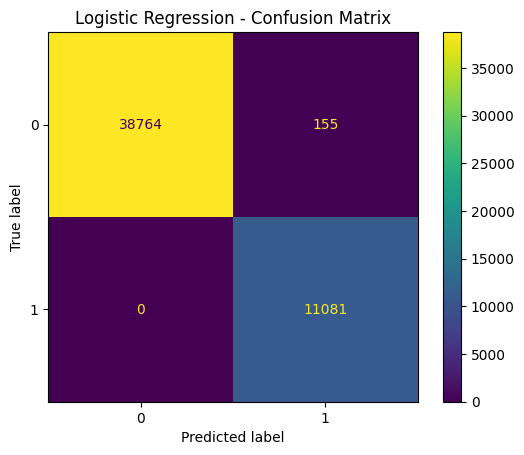

In [28]:
# Confusion Matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

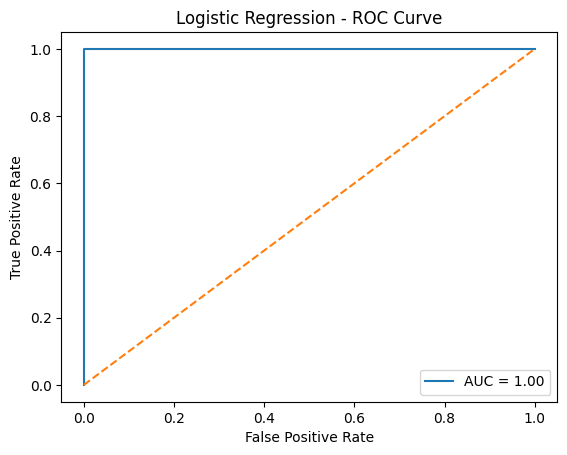

In [29]:
# ROC Curve:

from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

2. Random Forest Classifier

In [30]:
#Training the Model:

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [31]:
# Prediction and Evaluation:

y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38919
         1.0       1.00      1.00      1.00     11081

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

AUC-ROC: 1.0


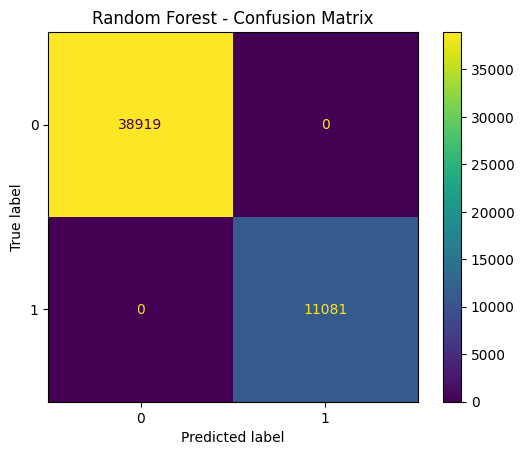

In [32]:
# Confusion Matrix:

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

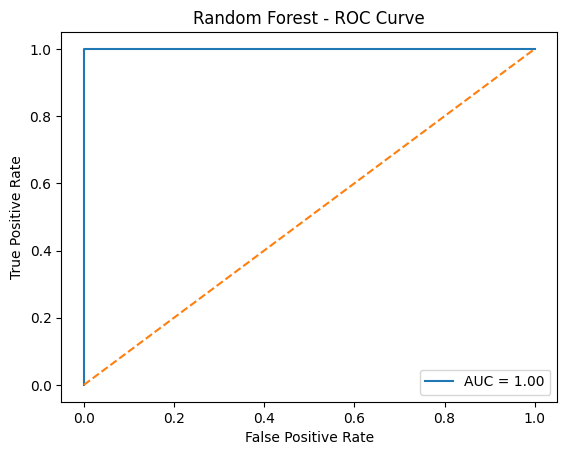

In [33]:
#ROC Curve:

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


3. Decision Tree Classifier

In [34]:
#Training the Model:

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Prediction and Evaluation:

y_pred_dt = model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]    

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_dt))



Decision Tree Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38919
         1.0       1.00      1.00      1.00     11081

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

AUC-ROC: 1.0


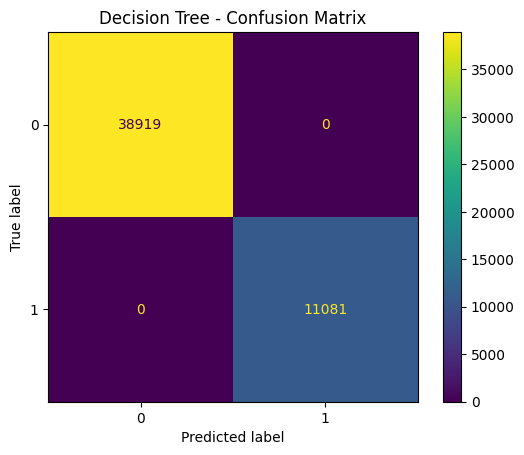

In [36]:
# Confusion Matrix:

cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()


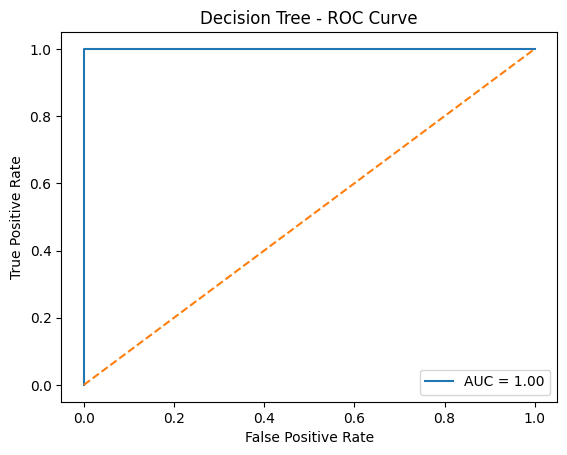

In [37]:
# ROC Curve:

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label=f"AUC = {auc_dt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


1. Changing Train/Test Data Proportions

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Try different train/test ratios 
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    # Split the dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Train Random Forest model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train_smote,y_train_smote)
    
    # Predict on test data
    y_pred = model_rf.predict(X_test)
    
    # Print accuracy and full classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Train/Test Ratio {int((1 - test_size) * 100)}:{int(test_size * 100)}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



🔹 Train/Test Ratio 80:20
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       1.00      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


🔹 Train/Test Ratio 70:30
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58365
         1.0       1.00      1.00      1.00     16635

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


🔹 Train/Test Ratio 60:40
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77820
         1.0       1.00      1.00      1.00  

2. Changing Train/Test Data Proportions

In [39]:
from sklearn.model_selection import train_test_split

# Reserve 20% as "future" or unseen data
X_main, X_unseen, y_main, y_unseen = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Step 2: Apply SMOTE on training portion
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_main, y_main)

# Step 3: Train model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_sm, y_train_sm)

# Step 4: Evaluate on completely unseen test data
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

y_pred_unseen = model_rf.predict(X_unseen)
y_prob_unseen = model_rf.predict_proba(X_unseen)[:, 1]

print(" Evaluation on Unseen Test Data:")
print(classification_report(y_unseen, y_pred_unseen))
print("AUC-ROC:", roc_auc_score(y_unseen, y_prob_unseen))

 Evaluation on Unseen Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       1.00      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

AUC-ROC: 1.0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Test using different random seeds
random_states = [1, 42, 99]

for seed in random_states:
    # Train/Test Split with changing random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    
    # Apply SMOTE
    smote = SMOTE(random_state=seed)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
    
    # Train and test the model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train_sm, y_train_sm)
    y_pred = model_rf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random State {seed} → Accuracy: {accuracy:.2f}")

Random State 1 → Accuracy: 1.00
Random State 42 → Accuracy: 1.00
Random State 99 → Accuracy: 1.00


In [41]:
from sklearn.metrics import classification_report

# Predict using the trained Random Forest model
y_pred_rf = model_rf.predict(X_test)

# Generate and print the classification report
print(" Classification Report for Balanced Check:")
print(classification_report(y_test, y_pred_rf))


 Classification Report for Balanced Check:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       1.00      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [42]:
# Evaluate accuracy on training data
train_accuracy = model_rf.score(X_train_smote, y_train_smote)

# Evaluate accuracy on test data
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_rf)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy :", test_accuracy)

Train Accuracy: 1.0
Test Accuracy : 1.0


In [43]:
# Calculate training and test accuracy
train_accuracy = model_rf.score(X_train_smote, y_train_smote)
test_accuracy = accuracy_score(y_test, y_pred_rf)

# Check the difference
accuracy_gap = abs(train_accuracy - test_accuracy)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy :", test_accuracy)
print("Accuracy Gap  :", accuracy_gap)

# Determine overfitting status
if accuracy_gap > 0.05:
    print(" Model may be overfitting.")
else:
    print("No overfitting detected.")

Train Accuracy: 1.0
Test Accuracy : 1.0
Accuracy Gap  : 0.0
No overfitting detected.


 Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       1.00      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



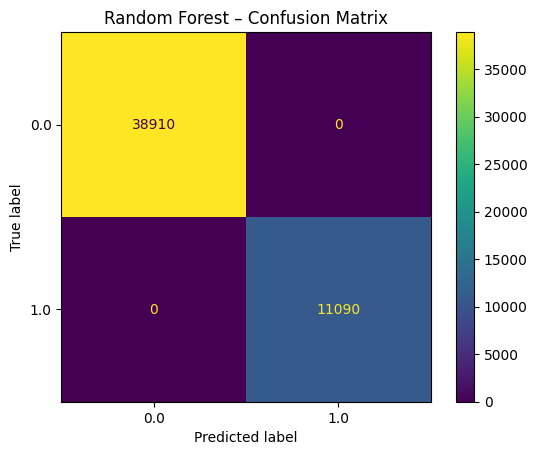

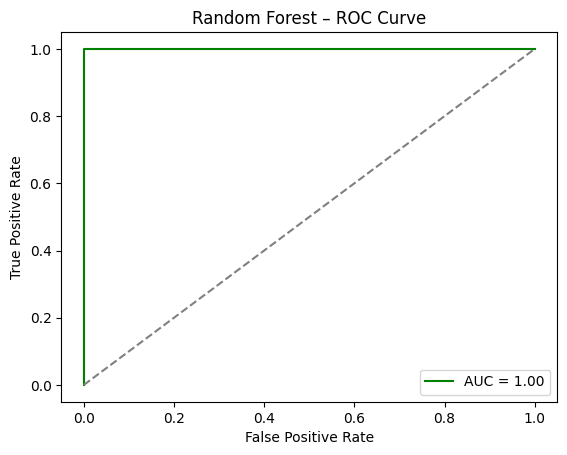

In [ ]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

# Step 5: Print classification metrics
print(" Classification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_rf))

# Step 6: Show confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
plt.title("Random Forest – Confusion Matrix")
plt.show()

# Step 7: Plot ROC Curve and calculate AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest – ROC Curve")
plt.legend()
plt.show()

 Classification Report (Logistic Regression with SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       0.99      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



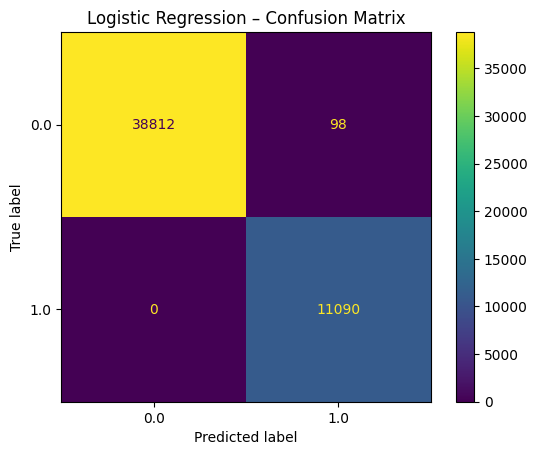

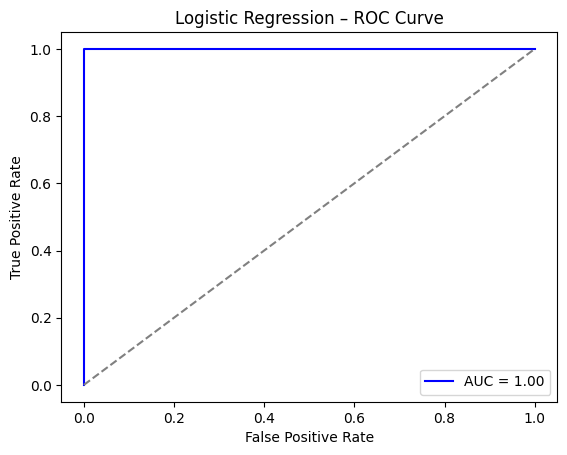

In [36]:
# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

# Step 5: Print classification report
print(" Classification Report (Logistic Regression with SMOTE):")
print(classification_report(y_test, y_pred_lr))

# Step 6: Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

# Step 7: Plot ROC Curve and AUC Score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {roc_auc_lr:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression – ROC Curve")
plt.legend()
plt.show()

 Classification Report (Decision Tree with SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38910
         1.0       1.00      1.00      1.00     11090

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



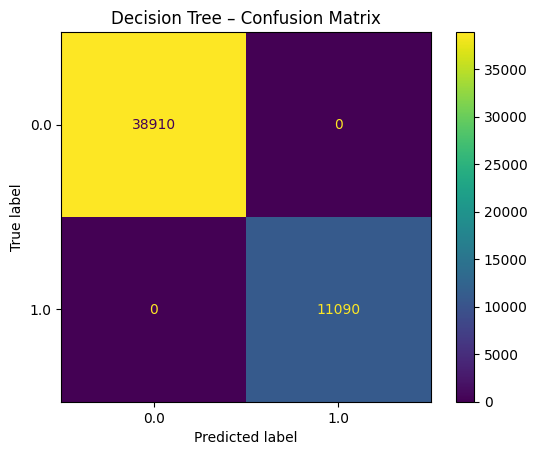

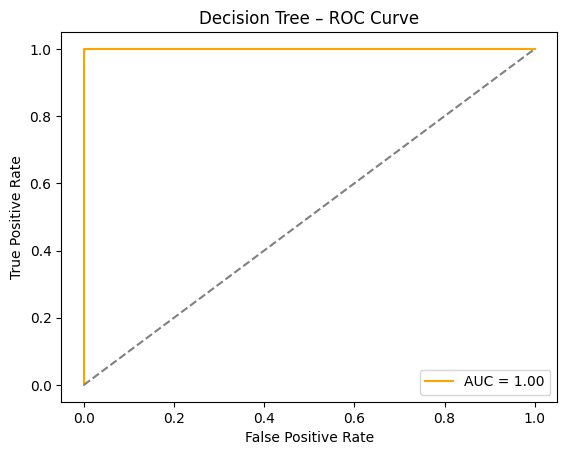

In [38]:
# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Train the Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_smote, y_train_smote)

# Step 4: Predict on test data
y_pred_dt = model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]

# Step 5: Print classification report
print(" Classification Report (Decision Tree with SMOTE):")
print(classification_report(y_test, y_pred_dt))

# Step 6: Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)
plt.title("Decision Tree – Confusion Matrix")
plt.show()

# Step 7: Plot ROC curve and compute AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_dt:.2f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree – ROC Curve")
plt.legend()
plt.show()

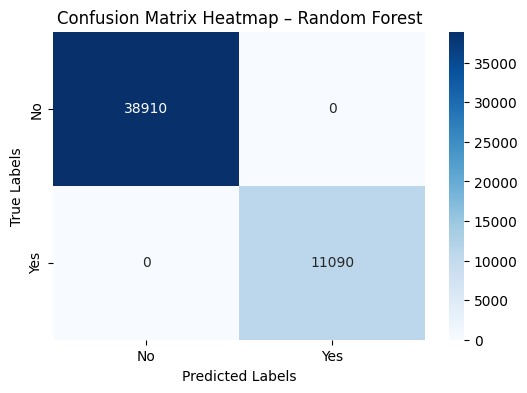

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # or y_pred_lr / y_pred_dt based on your model

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap – Random Forest')
plt.show()

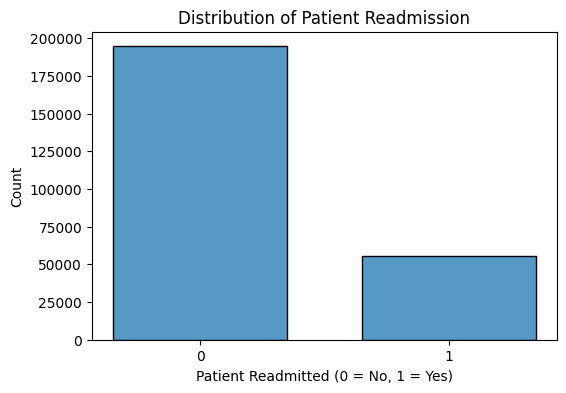

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Histogram of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(data=brain_tumor, x='Patient_Readmitted', bins=2, discrete=True, kde=False, shrink=0.7)
plt.title('Distribution of Patient Readmission')
plt.xlabel('Patient Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

In [21]:
import numpy as np

Q = np.zeros((5, 2))
R = np.array([[-1, 0], [-1, 0], [-1, 0], [-1, 100], [0, 0]])

for _ in range(100):
    s = np.random.randint(0, 4)
    while s != 4:
        a = np.random.choice([0, 1])
        ns = s + 1 if a == 1 else max(0, s - 1)
        Q[s, a] += 0.5 * (R[s, a] + 0.8 * np.max(Q[ns]) - Q[s, a])
        s = ns

print(Q)

[[ 39.96  51.2 ]
 [ 39.96  64.  ]
 [ 50.2   80.  ]
 [ 63.   100.  ]
 [  0.     0.  ]]
